<a href="https://colab.research.google.com/github/tinaghimire/data-mining/blob/main/Lab-4_KNN/Room_occupancy_resampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Coding/Occupancy_Estimation.csv')
df.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

In [5]:
categorical = df.select_dtypes('object').columns
categorical

Index(['Date', 'Time'], dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
df['Room_Occupancy_Count'].value_counts()

Room_Occupancy_Count
0    8228
2     748
3     694
1     459
Name: count, dtype: int64

In [8]:
# label_encoder = LabelEncoder()
# df['label'] = label_encoder.fit_transform(df['label'])
# df['label'] = df['label'].map({'male': 0, 'female': 1})
# df.head()

In [9]:
df['Room_Occupancy_Count'].value_counts()

Room_Occupancy_Count
0    8228
2     748
3     694
1     459
Name: count, dtype: int64

In [10]:
df.shape

(10129, 19)

In [11]:
df[['Date', 'Time']].value_counts().sum()

10129

In [12]:
df.drop(['Date', 'Time'], axis=1, inplace=True)

In [13]:
from sklearn.utils import resample

class_0 = df[df['Room_Occupancy_Count'] == 0]
class_1 = df[df['Room_Occupancy_Count'] == 1]
class_2 = df[df['Room_Occupancy_Count'] == 2]
class_3 = df[df['Room_Occupancy_Count'] == 3]

# Upsample the minority classes
class_1_upsampled = resample(class_1, replace=True, n_samples=len(class_0), random_state=42)
class_2_upsampled = resample(class_2, replace=True, n_samples=len(class_0), random_state=42)
class_3_upsampled = resample(class_3, replace=True, n_samples=len(class_0), random_state=42)

# Combine the upsampled classes
upsampled_df = pd.concat([class_0, class_1_upsampled, class_2_upsampled, class_3_upsampled])

In [14]:
from collections import Counter
original_class_counts = Counter(df['Room_Occupancy_Count'])
resampled_class_counts = Counter(upsampled_df['Room_Occupancy_Count'])

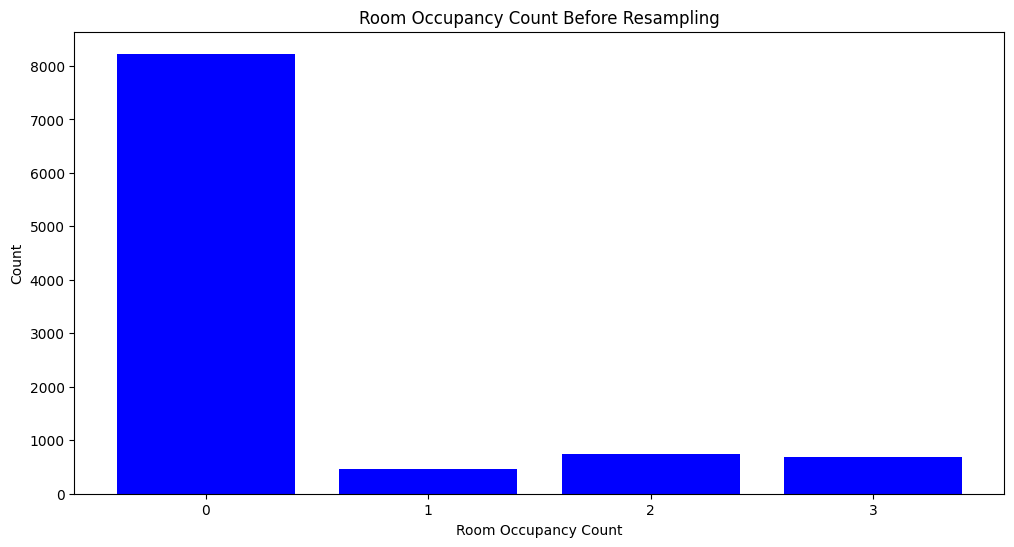

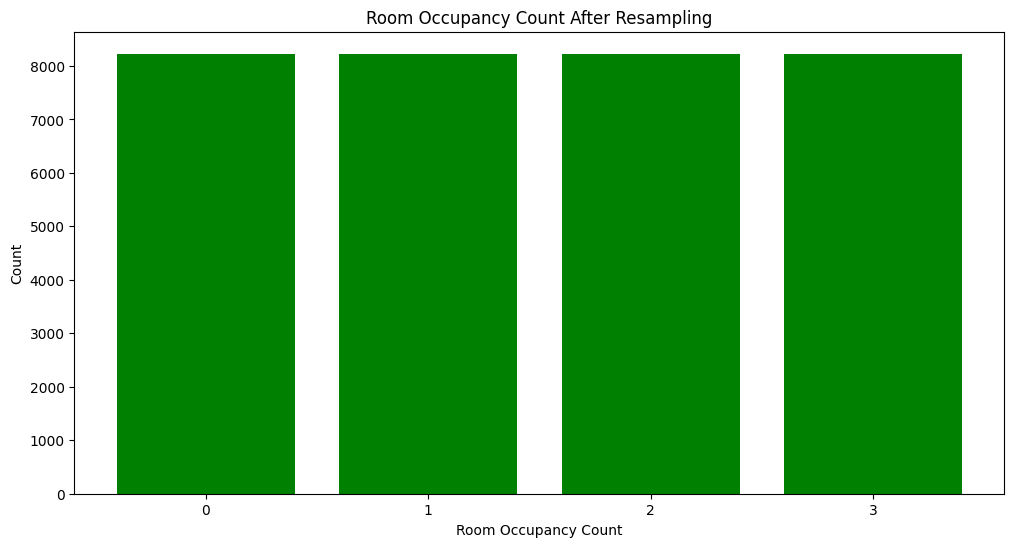

In [15]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot before resampling
plt.bar(original_class_counts.keys(), original_class_counts.values(), color='blue')
plt.title('Room Occupancy Count Before Resampling')
plt.xlabel('Room Occupancy Count')
plt.ylabel('Count')
plt.xticks(range(4))
plt.show()

# Plot after resampling
plt.figure(figsize=(12, 6))

plt.bar(resampled_class_counts.keys(), resampled_class_counts.values(), color='green')
plt.title('Room Occupancy Count After Resampling')
plt.xlabel('Room Occupancy Count')
plt.ylabel('Count')
plt.xticks(range(4))
plt.show()

In [16]:
df = upsampled_df

In [17]:
X = df.drop('Room_Occupancy_Count', axis=1)
y = df['Room_Occupancy_Count']

In [18]:
X.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR
346,26.19,27.25,26.13,26.44,19,22,97,60,0.42,3.03,3.67,0.64,950,-0.069231,1,1
347,26.19,27.06,26.13,26.38,19,22,98,59,2.32,2.08,1.64,0.10,960,-0.226923,1,1
348,26.19,26.94,26.13,26.38,19,22,97,60,0.19,0.18,0.32,0.08,970,-0.303846,0,1
349,26.19,26.88,26.06,26.38,19,22,98,60,0.10,0.11,0.11,0.06,965,-0.346154,0,0
350,26.19,26.88,26.06,26.44,20,24,101,62,0.07,0.05,0.06,0.06,970,-0.300000,0,0


In [19]:
y.head()

346    0
347    0
348    0
349    0
350    0
Name: Room_Occupancy_Count, dtype: int64

In [20]:
df.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,32912.000000,32912.000000,32912.000000,32912.000000,32912.000000,32912.000000,32912.000000,32912.000000,32912.000000,32912.000000,32912.000000,32912.000000,32912.000000,32912.000000,32912.000000,32912.000000,32912.000000
mean,25.787617,26.032618,25.413681,26.030386,92.817301,86.047642,90.650280,25.736175,0.420765,0.289486,0.395877,0.164897,608.933064,0.820845,0.340241,0.278622,1.500000
std,0.391918,0.812080,0.452517,0.340770,62.934395,104.079613,79.330697,21.810146,0.515892,0.432929,0.707155,0.216739,250.689897,1.440039,0.473797,0.448328,1.118051
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.000000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.440000,25.380000,25.060000,25.810000,7.000000,8.000000,28.000000,10.000000,0.080000,0.050000,0.060000,0.070000,375.000000,0.000000,0.000000,0.000000,0.750000
50%,25.880000,25.880000,25.500000,26.130000,119.000000,25.000000,67.000000,20.000000,0.200000,0.120000,0.110000,0.090000,565.000000,0.507692,0.000000,0.000000,1.500000
75%,26.130000,26.380000,25.810000,26.310000,148.000000,234.000000,179.000000,45.000000,0.600000,0.370000,0.300000,0.160000,800.000000,1.673077,1.000000,1.000000,2.250000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.000000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR
0,1.026719,1.499114,1.582991,1.202044,-1.172942,-0.615381,0.080042,1.571028,-0.001482,6.330263,4.630061,2.192083,1.360534,-0.618101,1.392514,1.609066
1,1.026719,1.265143,1.582991,1.025970,-1.172942,-0.615381,0.092648,1.525177,3.681518,4.135875,1.759361,-0.299431,1.400424,-0.727608,1.392514,1.609066
2,1.026719,1.117373,1.582991,1.025970,-1.172942,-0.615381,0.080042,1.571028,-0.447319,-0.252900,-0.107301,-0.391709,1.440315,-0.781026,-0.718125,1.609066
3,1.026719,1.043487,1.428299,1.025970,-1.172942,-0.615381,0.092648,1.571028,-0.621777,-0.414592,-0.404270,-0.483987,1.420370,-0.810406,-0.718125,-0.621478
4,1.026719,1.043487,1.428299,1.202044,-1.157053,-0.596165,0.130465,1.662730,-0.679930,-0.553185,-0.474977,-0.483987,1.440315,-0.778355,-0.718125,-0.621478


In [23]:
X_scaled.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR
count,3.291200e+04,3.291200e+04,3.291200e+04,3.291200e+04,3.291200e+04,3.291200e+04,3.291200e+04,3.291200e+04,3.291200e+04,3.291200e+04,3.291200e+04,3.291200e+04,3.291200e+04,3.291200e+04,3.291200e+04,3.291200e+04
mean,3.523352e-15,-1.746132e-15,2.847180e-15,-6.442640e-15,5.872254e-17,5.008687e-17,5.785897e-17,-9.288740e-17,-2.331630e-17,1.295350e-18,-9.067451e-18,-8.462954e-17,-2.314359e-16,-7.772101e-18,-1.658048e-16,5.051866e-17
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-2.162774e+00,-1.579446e+00,-2.151734e+00,-3.199818e+00,-1.474849e+00,-8.267609e-01,-1.142706e+00,-1.180027e+00,-6.993142e-01,-5.762836e-01,-5.032594e-01,-5.301264e-01,-1.052843e+00,-4.942300e+00,-7.181254e-01,-6.214784e-01
25%,-8.869768e-01,-8.036490e-01,-7.815978e-01,-6.467380e-01,-1.363620e+00,-7.498954e-01,-7.897477e-01,-7.215181e-01,-6.605457e-01,-5.531848e-01,-4.749766e-01,-4.378481e-01,-9.331713e-01,-5.700242e-01,-7.181254e-01,-6.214784e-01
50%,2.357248e-01,-1.879370e-01,1.907567e-01,2.923260e-01,4.160380e-01,-5.865565e-01,-2.981272e-01,-2.630089e-01,-4.279352e-01,-3.914931e-01,-4.042697e-01,-3.455698e-01,-1.752513e-01,-2.174644e-01,-7.181254e-01,-6.214784e-01
75%,8.736234e-01,4.277751e-01,8.758246e-01,8.205495e-01,8.768423e-01,1.421552e+00,1.113706e+00,8.832640e-01,3.474334e-01,1.859773e-01,-1.355836e-01,-2.259573e-02,7.621761e-01,5.918206e-01,1.392514e+00,1.609066e+00
max,1.511522e+00,3.654106e+00,1.715585e+00,1.554193e+00,1.146969e+00,1.652148e+00,2.386877e+00,2.212941e+00,6.705456e+00,7.277314e+00,4.630061e+00,1.492649e+01,2.637031e+00,5.666545e+00,1.392514e+00,1.609066e+00


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=43)

# Default Knn

In [25]:
from sklearn.neighbors import KNeighborsClassifier

#KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
y_pred = knn.predict(X_test)
y_pred

array([0, 2, 3, ..., 0, 1, 1])

In [27]:
output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
output.head()

,Actual,Predicted
6121,0,0
680,2,2
285,3,3
9803,0,0
3297,1,1


In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(y_test, y_pred)

0.9989366550205073

In [29]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1697
           1       1.00      1.00      1.00      1644
           2       1.00      1.00      1.00      1610
           3       1.00      1.00      1.00      1632

    accuracy                           1.00      6583
   macro avg       1.00      1.00      1.00      6583
weighted avg       1.00      1.00      1.00      6583



In [30]:
y_test, y_pred

(6121    0
 680     2
 285     3
 9803    0
 3297    1
        ..
 3730    2
 2890    1
 8939    0
 3351    1
 586     1
 Name: Room_Occupancy_Count, Length: 6583, dtype: int64,
 array([0, 2, 3, ..., 0, 1, 1]))

In [31]:
y_pred.dtype, y_test.dtype
y_test = np.array(y_test)
y_pred = np.array(y_pred)

In [32]:
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test).sort())
cm
cm.astype(int)

array([[1690,    1,    3,    3],
       [   0, 1644,    0,    0],
       [   0,    0, 1610,    0],
       [   0,    0,    0, 1632]])

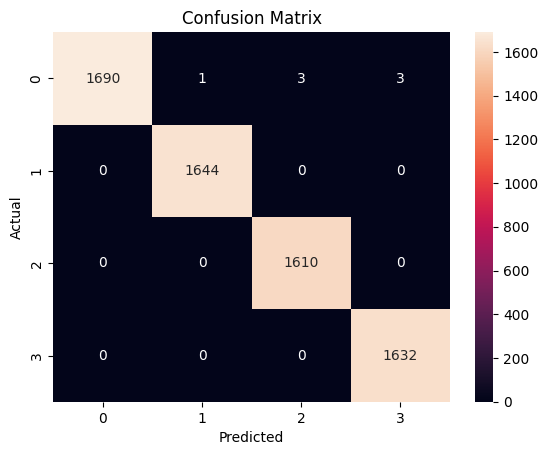

In [33]:
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5, 2.5, 3.5])
plt.yticks([0.5, 1.5, 2.5, 3.5])
plt.title('Confusion Matrix')
plt.show()

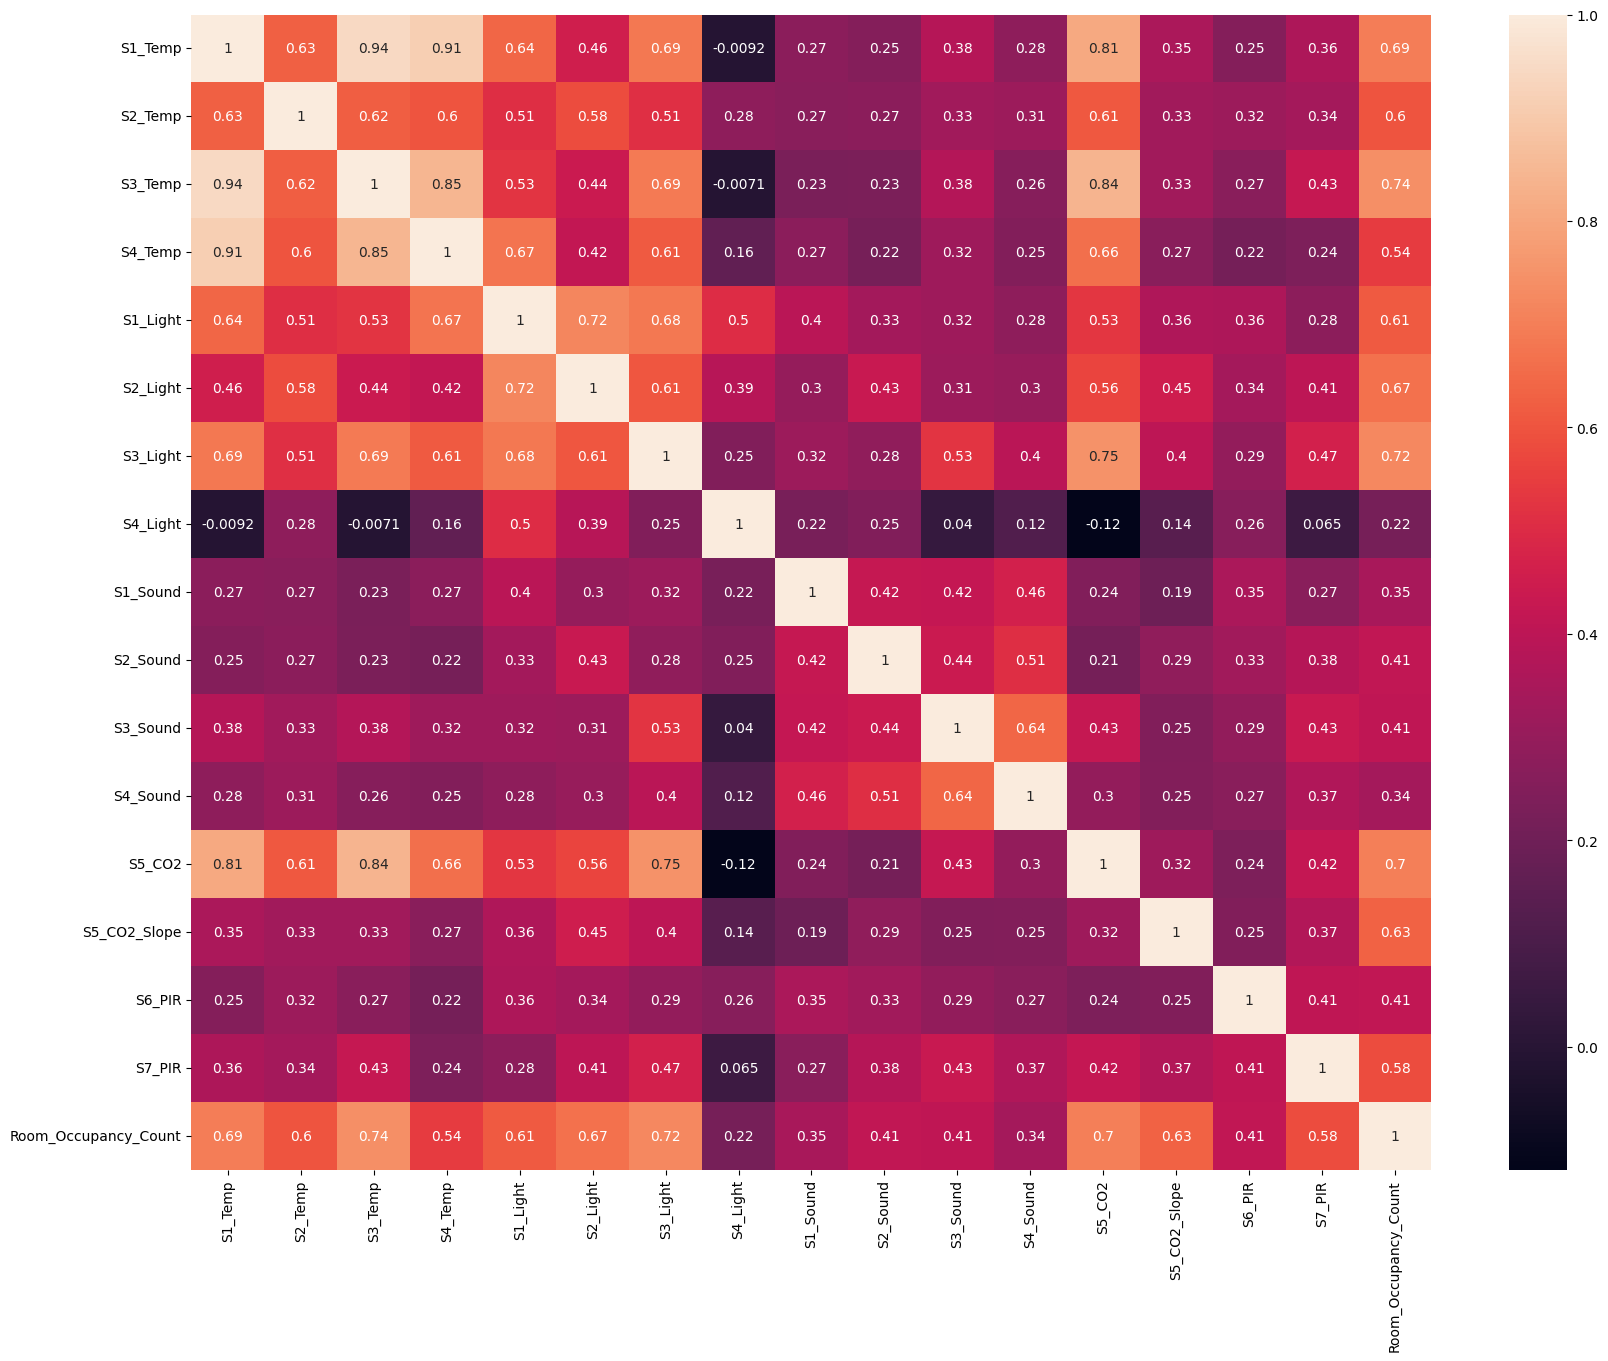

In [34]:
var = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(var, annot=True)
plt.show()

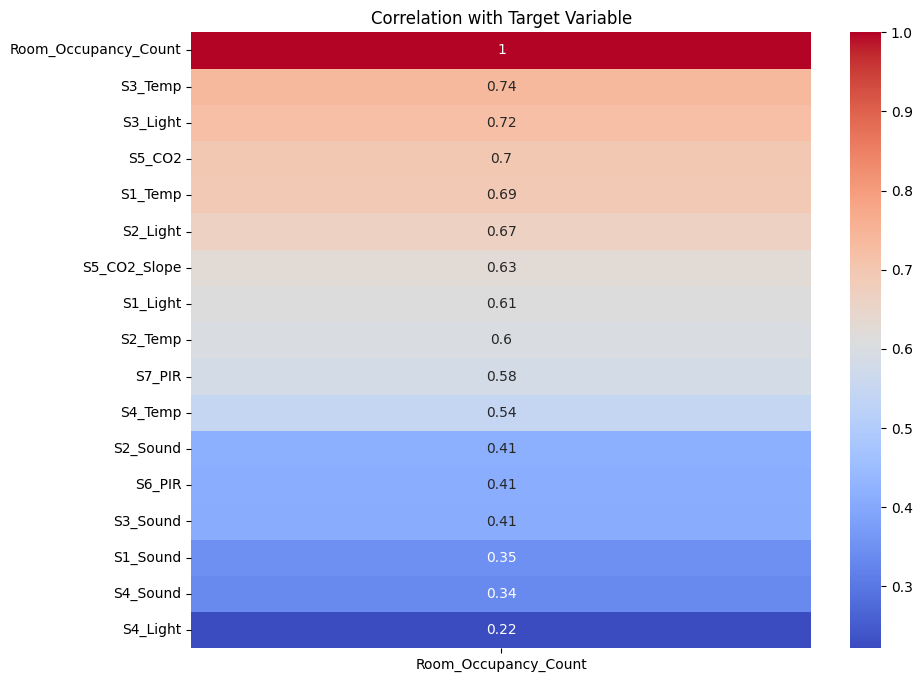

In [35]:
target = 'Room_Occupancy_Count'  # Replace with your actual target variable name
target_correlations = var[[target]].sort_values(by=target, ascending=False)

# Step 4: Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(target_correlations, annot=True, cmap='coolwarm')
plt.title('Correlation with Target Variable')
plt.show()


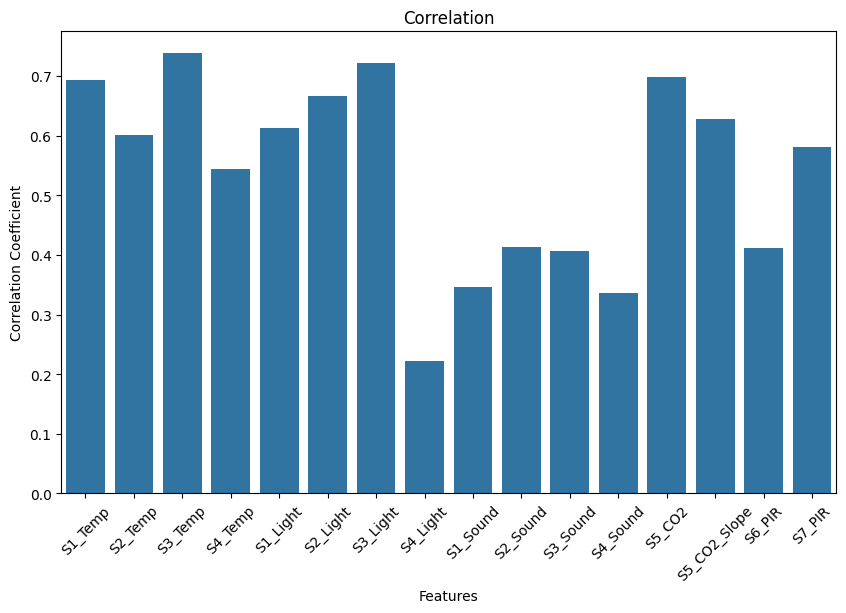

In [36]:
correlations = df.corr()['Room_Occupancy_Count'].drop('Room_Occupancy_Count')  # Drop 'Class' column since we want feature correlations

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=correlations)
plt.title('Correlation')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()

In [37]:
correlations_sorted = correlations.sort_values(ascending=False)[:5]
correlations_sorted

S3_Temp     0.737954
S3_Light    0.722506
S5_CO2      0.698712
S1_Temp     0.694213
S2_Light    0.667094
Name: Room_Occupancy_Count, dtype: float64

In [38]:
y_prob = knn.predict_proba(X_test)
y_prob

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

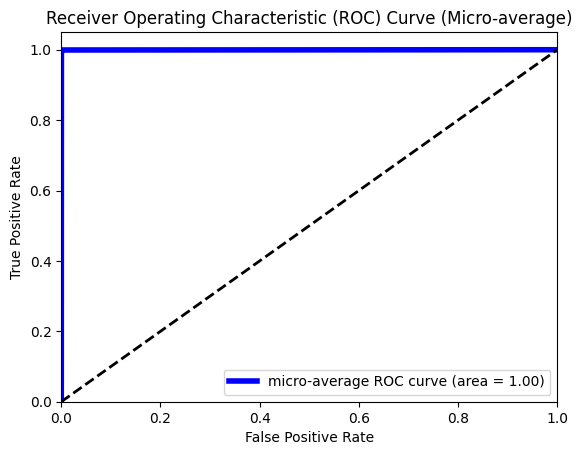

In [39]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot micro-average ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
         color='blue', linestyle='-', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Micro-average)')
plt.legend(loc="lower right")
plt.show()

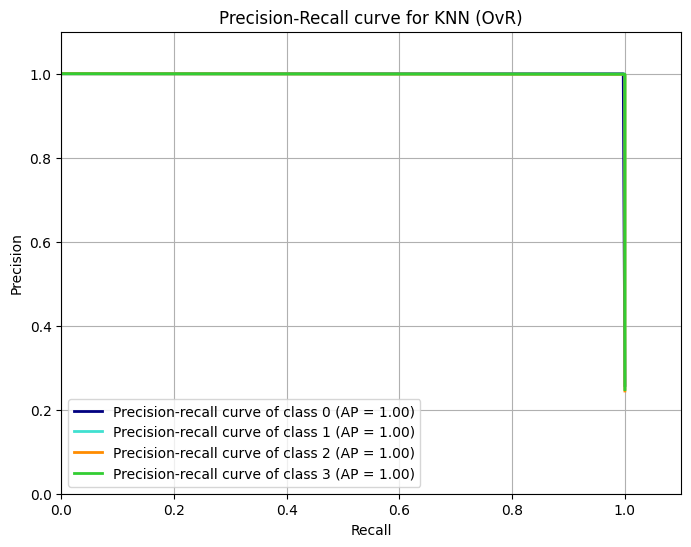

In [40]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(y_train.unique())):
    precision[i], recall[i], _ = precision_recall_curve(np.array(y_test == i), y_prob[:, i])
    average_precision[i] = average_precision_score(np.array(y_test == i), y_prob[:, i])

plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange', 'limegreen']
for i, color in zip(range(len(y_train.unique())), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label='Precision-recall curve of class {0} (AP = {1:0.2f})'
                   ''.format(i, average_precision[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for KNN (OvR)')
plt.xlim([0.0, 1.1])
plt.ylim([0.0, 1.1])

plt.legend(loc="best")
plt.grid(True)
plt.show()

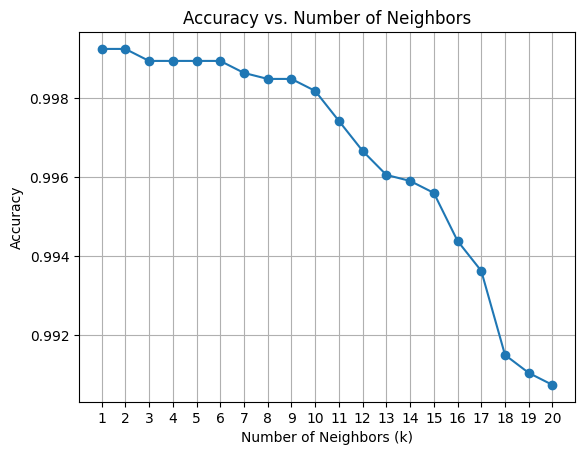

In [41]:
# Calculate accuracy for different number of neighbors
neighbors = list(range(1, 21))
accuracies = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot accuracy vs. number of neighbors
plt.figure()
plt.plot(neighbors, accuracies, marker='o')
plt.title('Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(neighbors)
plt.grid(True)
plt.show()

# Default Knn

In [42]:
from sklearn.metrics.pairwise import euclidean_distances

In [43]:
feature_weights = np.random.rand(X_train.shape[1])

# Custom distance function with random weights
def weighted_euclidean(X, Y, feature_weights):
    X_scaled = X * feature_weights
    Y_scaled = Y * feature_weights
    return np.sqrt(((X_scaled - Y_scaled) ** 2).sum())

In [44]:
# Implement KNN with custom distance
knn = KNeighborsClassifier(n_neighbors=5,
                           metric=weighted_euclidean,
                           metric_params={'feature_weights': feature_weights})

In [45]:
knn.fit(X_train, y_train)

KNeighborsClassifier(metric=<function weighted_euclidean at 0x78e711781ea0>,
                     metric_params={'feature_weights': array([0.32262086, 0.47880757, 0.6499438 , 0.40434667, 0.20466574,
       0.70184819, 0.7685168 , 0.44351142, 0.44936358, 0.07715237,
       0.24370252, 0.25712562, 0.15855802, 0.21451033, 0.10189508,
       0.15862516])})

In [46]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

In [47]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9990885614461492


In [48]:
output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
output.head()

,Actual,Predicted
0,0,0
1,2,2
2,3,3
3,0,0
4,1,1


In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(y_test, y_pred)

0.9990885614461492

In [50]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1697
           1       1.00      1.00      1.00      1644
           2       1.00      1.00      1.00      1610
           3       1.00      1.00      1.00      1632

    accuracy                           1.00      6583
   macro avg       1.00      1.00      1.00      6583
weighted avg       1.00      1.00      1.00      6583



In [51]:
cm = confusion_matrix(y_test, y_pred)
cm
cm.astype(int)

array([[1695,    1,    1,    0],
       [   0, 1644,    0,    0],
       [   0,    0, 1610,    0],
       [   0,    4,    0, 1628]])

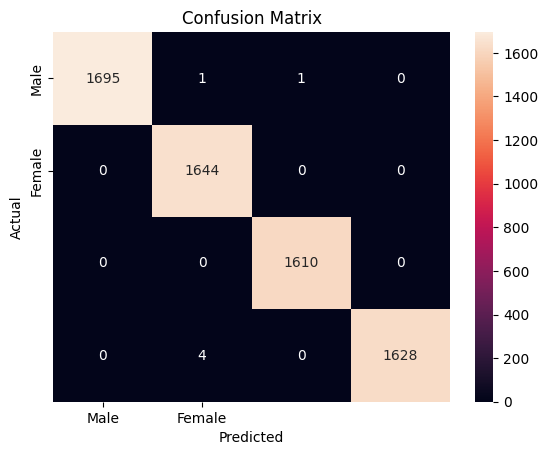

In [52]:
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Male', 'Female'])
plt.yticks([0.5, 1.5], ['Male', 'Female'])
plt.title('Confusion Matrix')
plt.show()

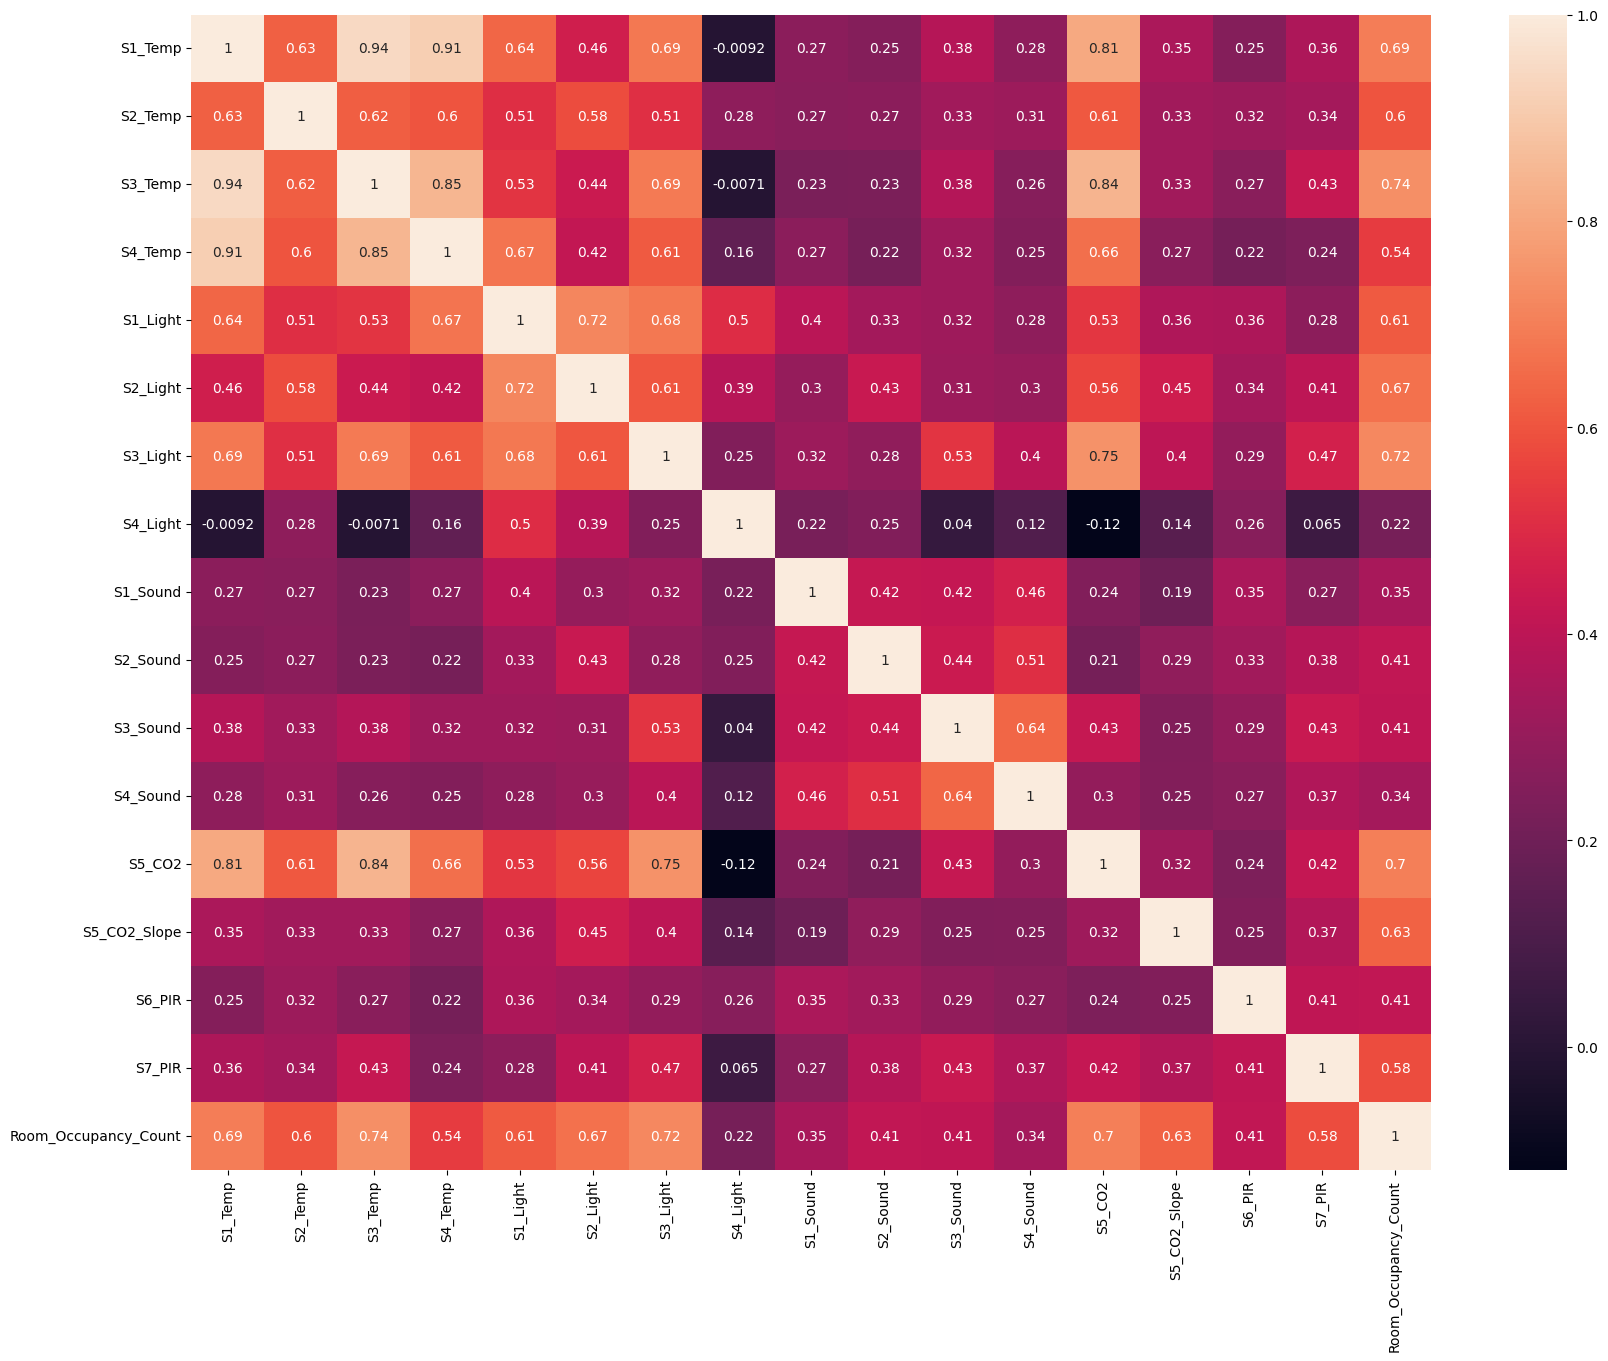

In [53]:
var = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(var, annot=True)
plt.show()

In [54]:
correlations = df.corr()['label'].drop('label')  # Drop 'Class' column since we want feature correlations

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=correlations)
plt.title('Correlation')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()

KeyError: 'label'

In [ ]:
correlations_sorted = correlations.sort_values(ascending=False)[:5]
correlations_sorted

In [ ]:
# Calculate accuracy for different number of neighbors
neighbors = list(range(1, 21))
accuracies = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,
                               metric=weighted_euclidean,
                               metric_params={'feature_weights': feature_weights})
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot accuracy vs. number of neighbors
plt.figure()
plt.plot(neighbors, accuracies, marker='o')
plt.title('Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(neighbors)
plt.grid(True)
plt.show()

In [ ]:
knn.classes_

In [ ]:
knn_kd = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
knn_kd.fit(X_train, y_train)


In [ ]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

In [ ]:
Z = knn_kd.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [ ]:
# Plot the decision boundaries and the mesh grid
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN with KD Tree Decision Boundaries')
plt.show()